<a href="https://colab.research.google.com/github/Mahmoudkhaled17/MPG-model-prediction/blob/main/mpg_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d uciml/autompg-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/autompg-dataset
License(s): CC0-1.0
  0% 0.00/6.31k [00:00<?, ?B/s]
100% 6.31k/6.31k [00:00<00:00, 13.2MB/s]


In [ ]:
!unzip autompg-dataset.zip

Archive:  autompg-dataset.zip
  inflating: auto-mpg.csv            


In [ ]:
import pandas as pd
df = pd.read_csv("auto-mpg.csv")

## EDA

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
df["origin"].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [ ]:
import seaborn as sns

<Axes: ylabel='mpg'>

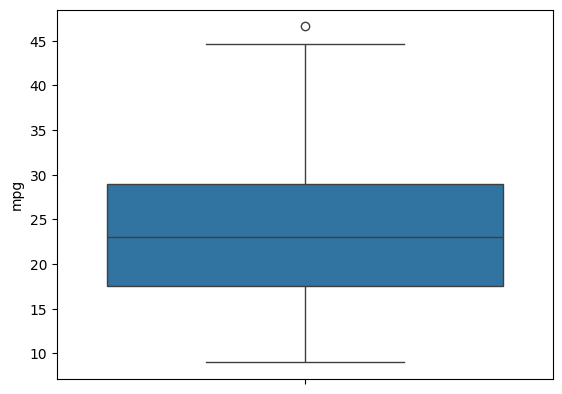

In [ ]:
sns.boxplot(df["mpg"])

<Axes: >

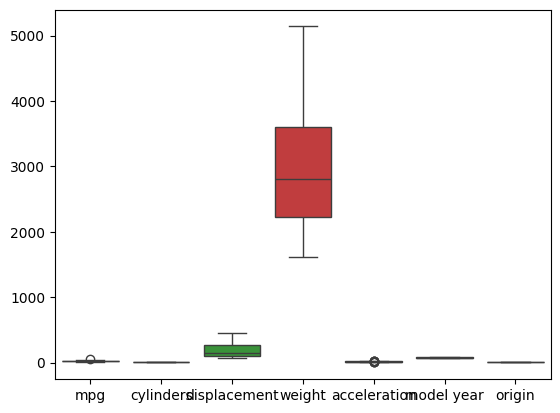

In [ ]:
sns.boxplot(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


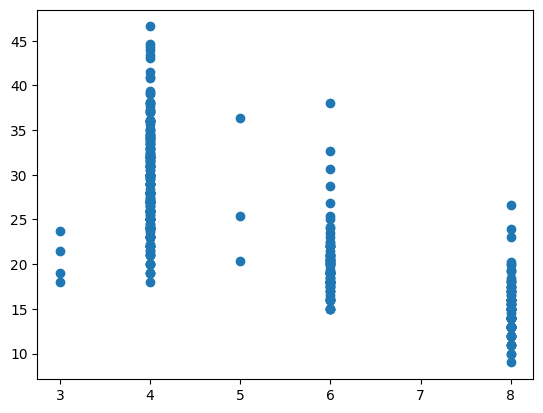

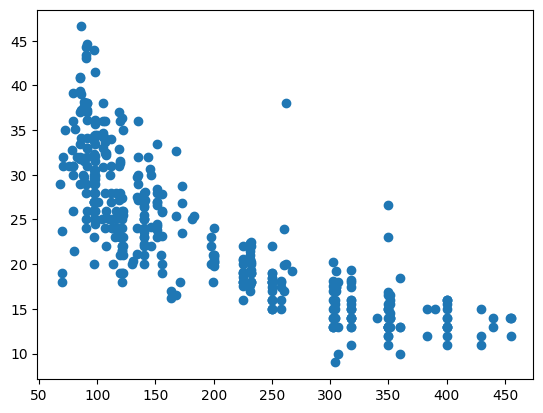

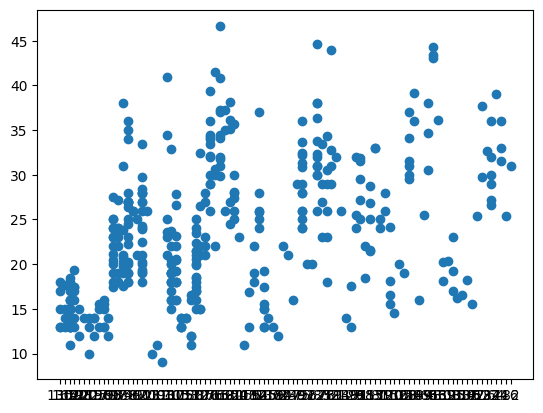

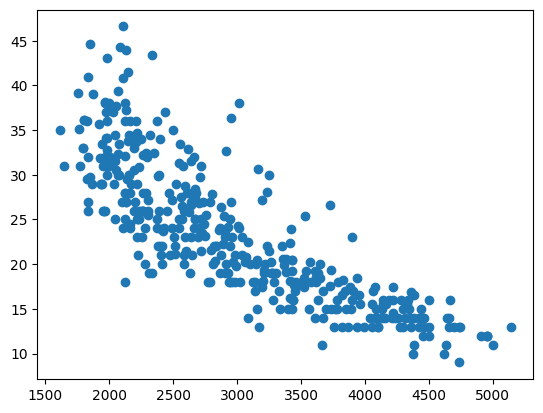

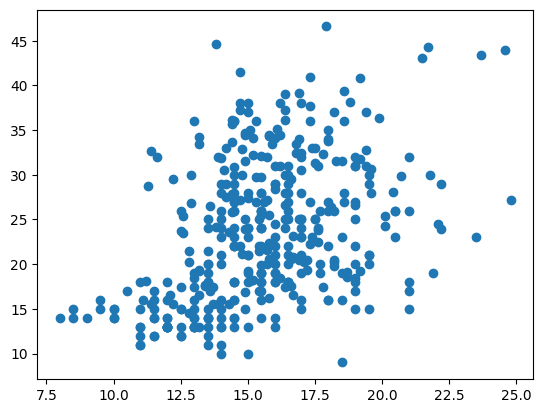

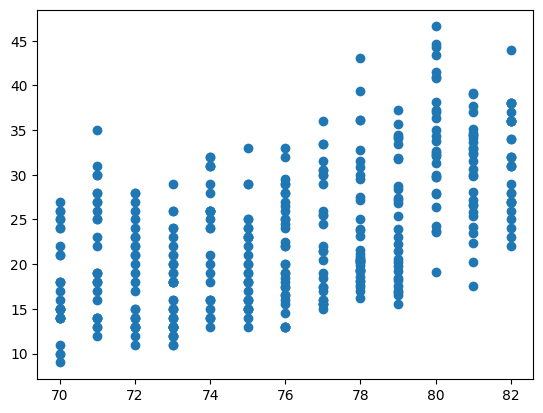

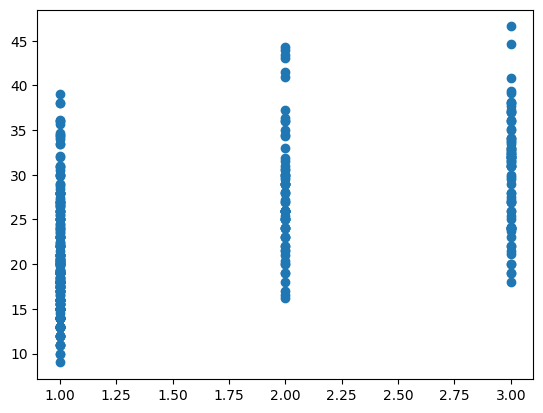

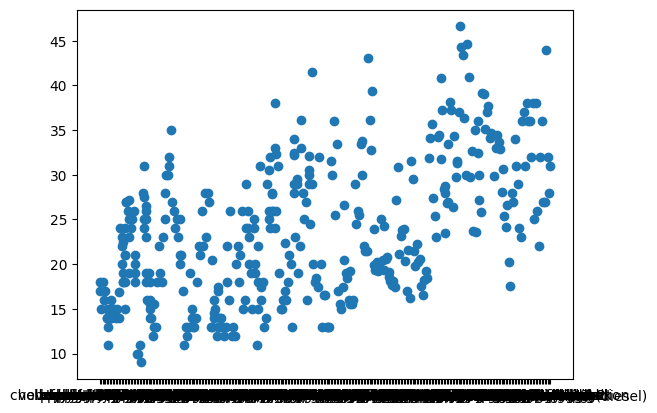

In [ ]:
for i in df.columns[1:]:
  plt.scatter(df[i],df["mpg"])
  plt.show()

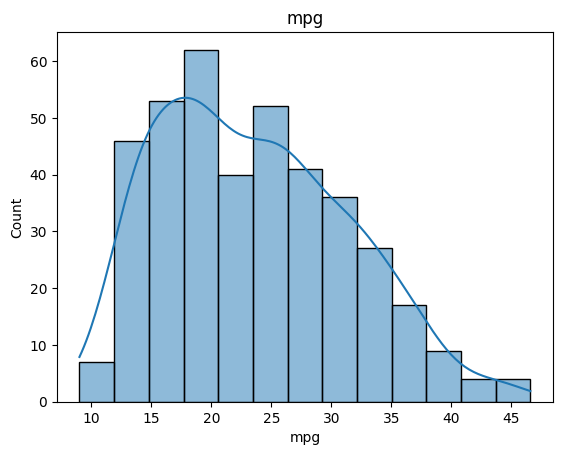

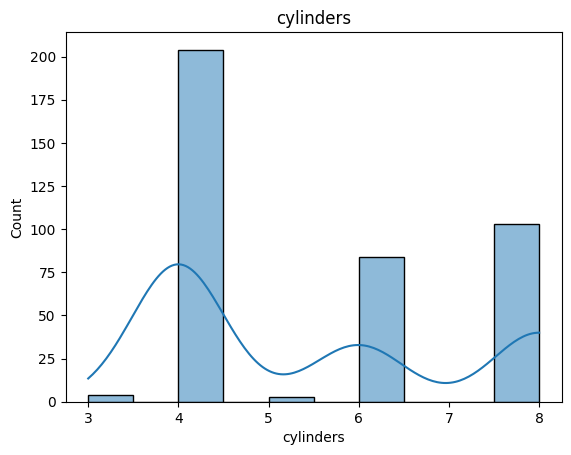

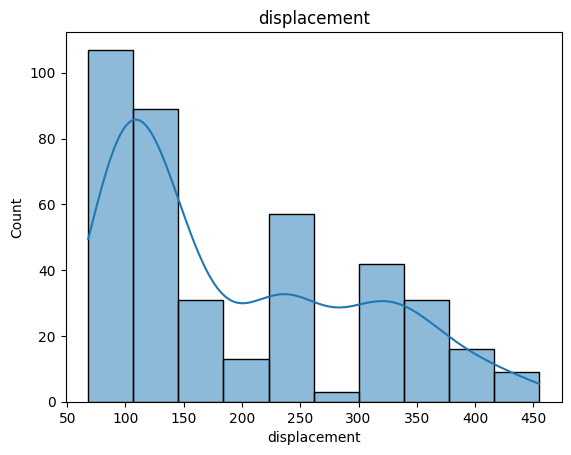

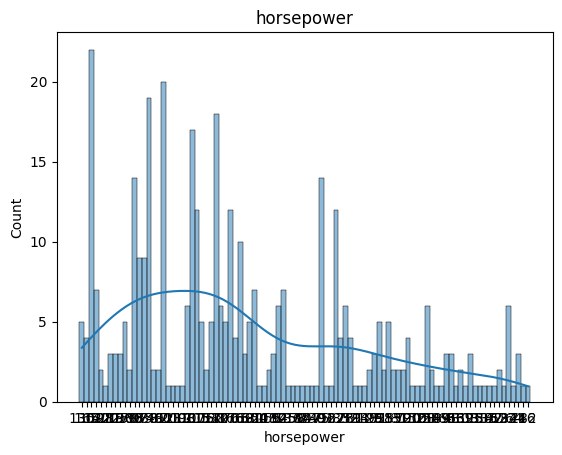

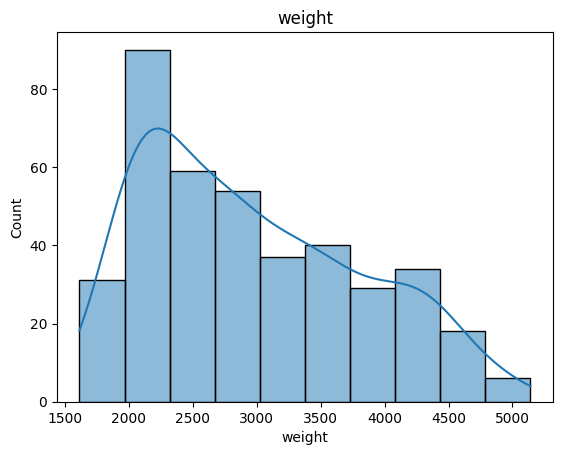

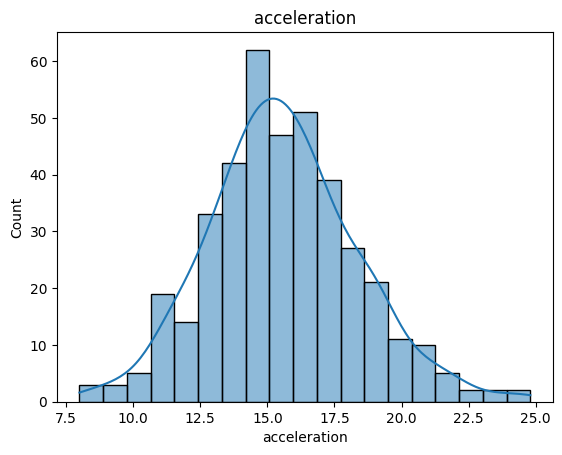

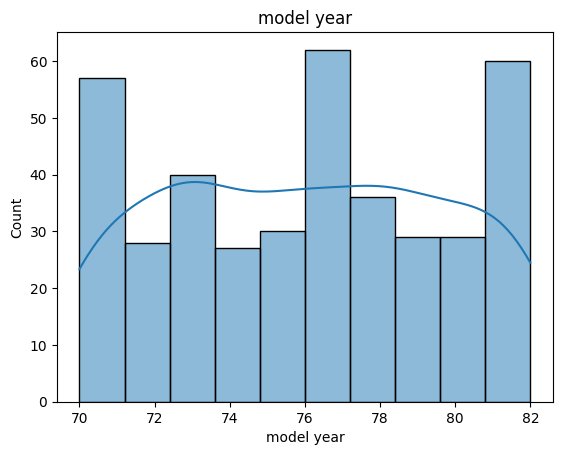

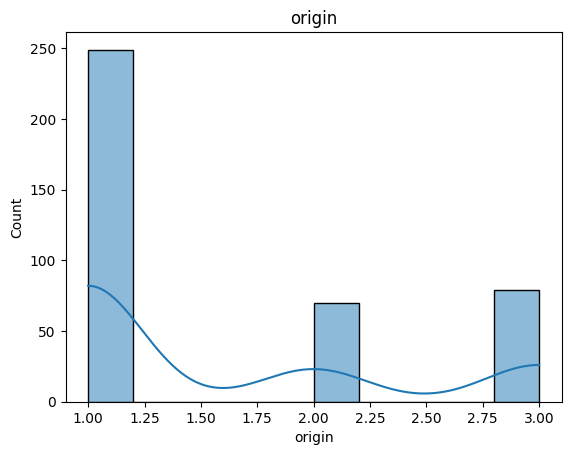

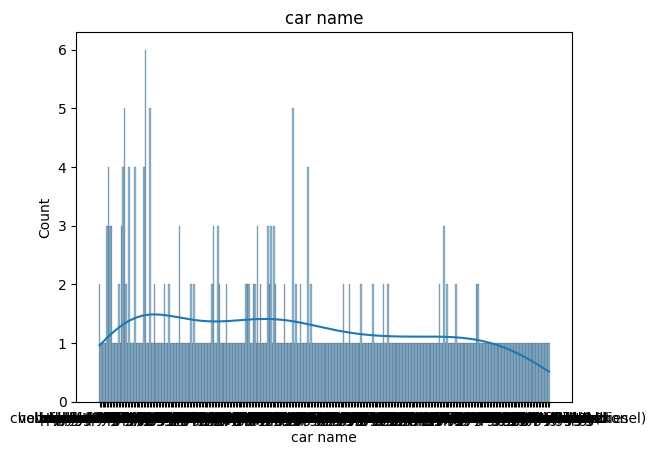

In [ ]:
import matplotlib.pyplot as plt
for i in df.columns:
  sns.histplot(df[i],kde=True)
  plt.title(i)
  plt.show()

In [ ]:
df[df.columns[1]].value_counts()

cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64

Text(0.5, 1.0, 'cylinders')

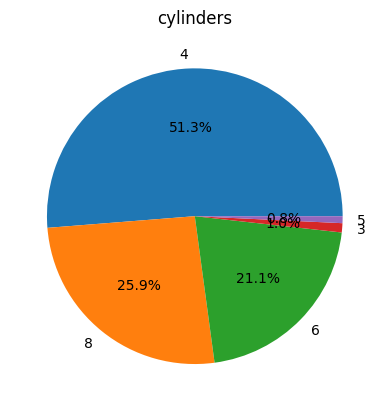

In [ ]:
  plt.pie(df[df.columns[1]].value_counts().values,labels=df[df.columns[1]].value_counts().index,autopct="%1.1f%%")
  plt.title(df.columns[1])

Text(0.5, 1.0, 'origin')

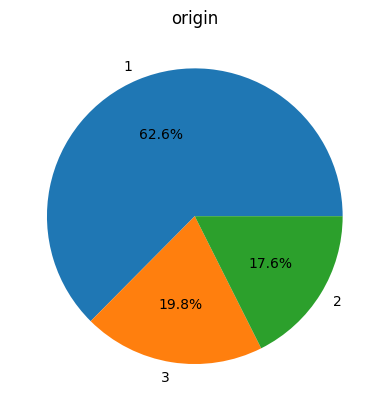

In [ ]:
  plt.pie(df[df.columns[7]].value_counts().values,labels=df[df.columns[7]].value_counts().index,autopct="%1.1f%%")
  plt.title(df.columns[7])

In [ ]:
df["car name"].value_counts()

car name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64

## Data processing

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["car name"] = le.fit_transform(df["car name"])

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,49
1,15.0,8,350.0,165,3693,11.5,70,1,36
2,18.0,8,318.0,150,3436,11.0,70,1,231
3,16.0,8,304.0,150,3433,12.0,70,1,14
4,17.0,8,302.0,140,3449,10.5,70,1,161


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [ ]:
df["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [ ]:
df[df["horsepower"]=="?"]=None

In [ ]:
df["horsepower"]=df["horsepower"].astype(float)
df["horsepower"].fillna(df["horsepower"].mean(),inplace=True)

<Axes: >

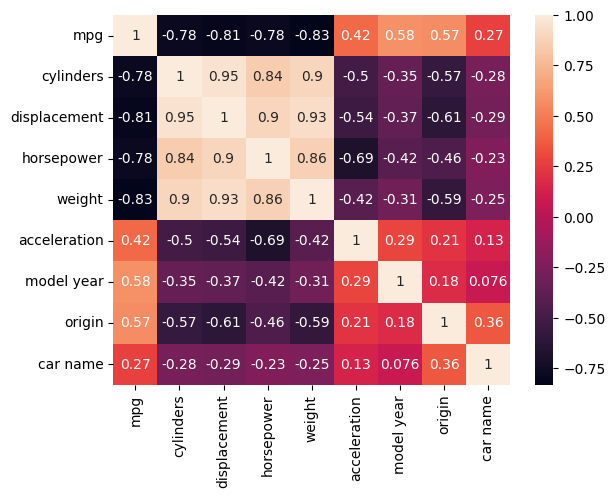

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.drop(["cylinders","horsepower","displacement"],axis=1,inplace=True)

<Axes: >

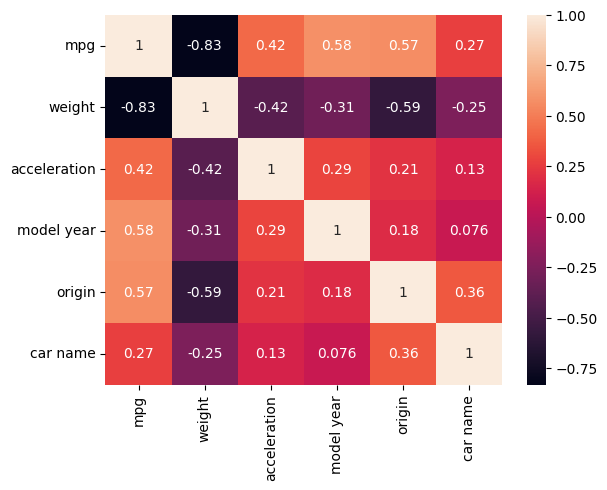

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
ss = StandardScaler()
mm = MinMaxScaler()
df_1= mm.fit_transform(df)
df_2= ss.fit_transform(df)

In [ ]:
df_1=pd.DataFrame(df_1,columns=["mpg","weight","acceleration","model year","origin","car name"])
df_2=pd.DataFrame(df_2,columns=["mpg","weight","acceleration","model year","origin","car name"])

In [ ]:
df_1.head()

,mpg,weight,acceleration,model year,origin,car name
0,0.239362,0.536150,0.238095,0.0,0.0,0.161184
1,0.159574,0.589736,0.208333,0.0,0.0,0.118421
2,0.239362,0.516870,0.178571,0.0,0.0,0.759868
3,0.186170,0.516019,0.238095,0.0,0.0,0.046053
4,0.212766,0.520556,0.148810,0.0,0.0,0.529605


In [ ]:
df_2.head()

,mpg,weight,acceleration,model year,origin,car name
0,-0.698638,0.620540,-1.285258,-1.625315,-0.716641,-1.110620
1,-1.083498,0.843334,-1.466724,-1.625315,-0.716641,-1.255965
2,-0.698638,0.540382,-1.648189,-1.625315,-0.716641,0.924205
3,-0.955212,0.536845,-1.285258,-1.625315,-0.716641,-1.501933
4,-0.826925,0.555706,-1.829655,-1.625315,-0.716641,0.141580


In [ ]:
df_1.isna().sum()

mpg             6
weight          6
acceleration    6
model year      6
origin          6
car name        6
dtype: int64

In [ ]:
df_2.isna().sum()

mpg             6
weight          6
acceleration    6
model year      6
origin          6
car name        6
dtype: int64

In [ ]:
df_2.dropna(inplace=True)
df_1.dropna(inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df_2.drop("mpg",axis=1),df_2["mpg"],test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Polynomial features transformation
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
Y_pred = lin_reg.predict(poly_features.transform(X_test))
r2_score(Y_test, Y_pred)

0.8784976707569978

In [ ]:
lin2=LinearRegression()
lin2.fit(X_train,Y_train)

LinearRegression()

In [ ]:
r2_score(Y_test,lin2.predict(X_test))

0.7772897574135595

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
r2_score(Y_test,rf.predict(X_test))

0.9017116492721201

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
r2_score(Y_test,dt.predict(X_test))

0.8731835649348342

In [ ]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
r2_score(Y_test,xgb.predict(X_test))

0.8926962523394232